## Exploratory Data Analysis

In [1]:
from TFG_utils import returnFiles, take_vmrk_files, take_vhdr_files, take_eeg_files, Get_Start_End_mrk, Get_spot_start_samples, plot_spots
import matplotlib.pyplot as plt
import numpy as np
import mne

print('MNE version:',mne.__version__)
%matplotlib notebook

MNE version: 0.20.7


### COLLECTING DATA

In [2]:
foldername = 'EEG_folders'
EEG_files=returnFiles(foldername)
print('There are',len(EEG_files),'EEG subject folders.')

vmrk_files=take_vmrk_files(EEG_files)
vhdr_files=take_vhdr_files(EEG_files)
eeg_files=take_eeg_files(EEG_files)

i=3 # Choosing EEG recording to use 

vmrk_filename=vmrk_files[i]
vhdr_filename=vhdr_files[i]
eeg_filename=eeg_files[i]

print('\n',eeg_filename,'\n',vhdr_filename,'\n',vmrk_filename,'\n')

raw_eeg = mne.io.read_raw_brainvision(vhdr_files[i],verbose=True).load_data(verbose=True)
info=raw_eeg.info

#Select channel to represent:
ch = 2 #Channel F3; ch = 3 #Channel F7; ch = 28 #Channel F4; ch = 29 #Channel F8

print('\n')
print('Subject:',eeg_filename[-8:-4])
print('Channel:', info['ch_names'][ch])

There are 5 EEG subject folders.

 EEG_folders\eeg_example_5\Neuromarketing2900.eeg 
 EEG_folders\eeg_example_5\Neuromarketing2900.vhdr 
 EEG_folders\eeg_example_5\Neuromarketing2900.vmrk 

Extracting parameters from EEG_folders\eeg_example_5\Neuromarketing2900.vhdr...
Setting channel info structure...
Reading 0 ... 252619  =      0.000 ...   505.238 secs...


Subject: 2900
Channel: F3


### DATA STRUCTURE

In [3]:
raw_eeg

<RawBrainVision | Neuromarketing2900.eeg, 31 x 252620 (505.2 s), ~59.8 MB, data loaded>

In [4]:
print('There are', info['nchan'],'channels:')
print(info['ch_names']) # Number and name of channels

There are 31 channels:
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2']


In [5]:
print('There are',raw_eeg.n_times,'time samples') # Number of time samples

There are 252620 time samples


In [6]:
fs=info['sfreq']
print('The sampling frequency is:',fs,'Hz')

The sampling frequency is: 500.0 Hz


### GRAPHIC REPRESENTATION

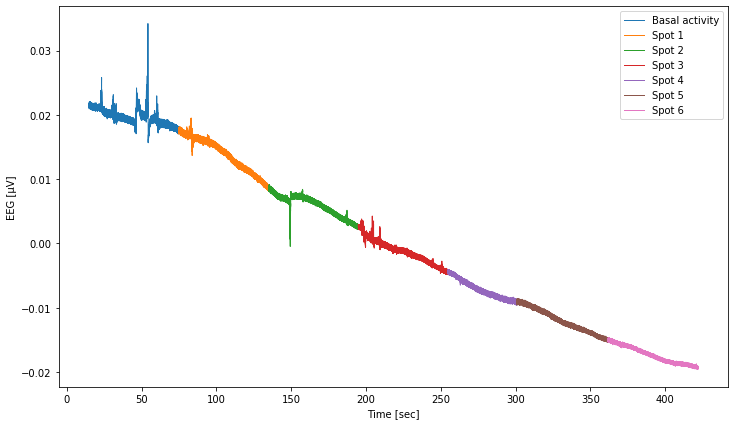

In [7]:
plot_spots(vmrk_filename,raw_eeg,ch)

Effective window size : 4.096 (s)


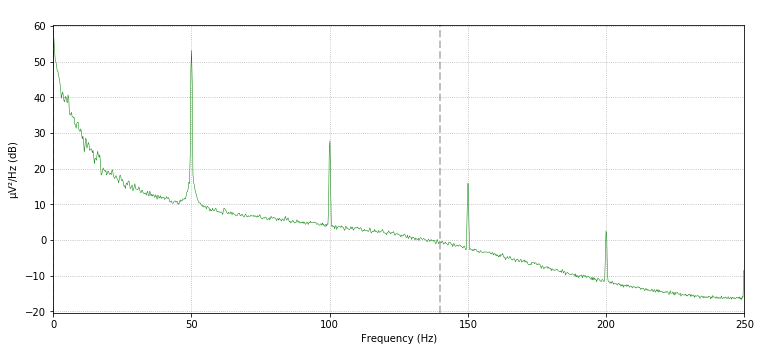

In [8]:
plt.figure(figsize=(12,5))
ax = plt.axes()
raw_eeg.plot_psd(area_mode=None, ax=ax, dB=True, show=False, average=True, estimate='power', line_alpha=None, color='green')
ax.set_title(' ', fontsize=16)
plt.show()